# 11. 어레이 인덱싱

### 주요 내용

- **어레이의 축**

- **인덱싱과 슬라이싱**

- 부울 인덱싱

- 팬시 인덱싱

## 11.1. 어레이의 축과 인덱스

### 어레이의 축

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy-array_axis.jpg" style="width:70%;"></div>

### 어레이의 인덱스

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy-array_index.png" style="width:30%;"></div>

## 11.2. 인덱싱과 슬라이싱

### 1차원 어레이 인덱싱, 슬라이싱

- 1차원 어레이의 경우 리스트의 경우와 거의 동일하다.

In [1]:
import numpy as np

arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [2]:
arr[5]

5

In [3]:
arr[5:8]

array([5, 6, 7])

* 슬라이싱 활용: 구간을 특정 값으로 대체하는 기능

In [4]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

### 주의사항

In [7]:
arr_list = list(arr)
arr_list

[0, 1, 2, 3, 4, 12, 12, 12, 8, 9]

In [8]:
arr_list[5:8] = 12

TypeError: can only assign an iterable

대신에 아래와 같이 리스트를 값으로 지정해야 한다.

In [9]:
arr_list[5:8] = [12, 12, 12]

### 뷰<font size='2'>view</font> 이해

어레이 슬라이싱은 뷰를 사용한다.

In [10]:
arr_slice = arr[5:8]
arr_slice

[12, 12, 12]

`arr` 변수가 가리키는 어레이의 항목도 함께 달라진다.

In [11]:
arr_slice[1] = 3450
arr

[0, 1, 2, 3, 4, 12, 12, 12, 8, 9]

### `copy()` 메서드

원본을 그대로 유지하고자 한다면 어레이를 새로 생성해서 사용해야 하며, 이를 위해 `copy()` 메서드를 활용한다.

In [12]:
arr_slice2 = arr[5:8].copy()
arr_slice2

[12, 12, 12]

`arr_slice2`를 변경해도 `arr`은 영향받지 않는다.

In [37]:
arr_slice2[1] = 12
arr

[0, 1, 2, 3, 4, 12, 12, 12, 8, 9]

### 2차원 어레이 인덱싱

In [15]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [16]:
arr2d[0][2]

3

In [17]:
arr2d[0, 2]

3

### 2차원 어레이 슬라이싱

In [18]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

리스트 슬라이싱 방식을 동일하게 적용할 수 있다.

In [20]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

### 2차원 어레이 행과 열 동시 슬라이싱

In [22]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy149-1.png" style="width:350px;"></div>

In [23]:
arr2d[1, :2]

array([4, 5])

In [38]:
arr2d[1:2, :2]

array([[4, 5]])

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy149-4.png" style="width:350px;"></div>

### 예제

In [30]:
arr = np.arange(36).reshape((6, 6)) + np.arange(0, 21, 4).reshape(6, 1)
arr

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy-2darray.png" style="width:150px;"></div>

### 빨강색 1차원 어레이

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy-2darray.png" style="width:150px;"></div>

In [31]:
arr[0, 3:5]

array([3, 4])

### 파랑색 2차원 어레이

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy-2darray.png" style="width:150px;"></div>

In [32]:
arr[:, 2:3]

array([[ 2],
       [12],
       [22],
       [32],
       [42],
       [52]])

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy-2darray.png" style="width:150px;"></div>

In [33]:
arr[:, 2]

array([ 2, 12, 22, 32, 42, 52])

### 보라색 2차원 어레이 (스텝 활용)

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy-2darray.png" style="width:150px;"></div>

In [34]:
arr[2:5:2, 0::2]

array([[20, 22, 24],
       [40, 42, 44]])

### 초록색 2차원 어레이

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/numpy-2darray.png" style="width:150px;"></div>

In [35]:
arr[4:, 4:]

array([[44, 45],
       [54, 55]])

### 3차원 어레이 인덱싱

In [16]:
arr3d = np.array([[[1, 2, 3], 
                   [4, 5, 6]], 
                  
                  [[7, 8, 9], 
                   [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [38]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
arr3d = np.array([[[1, 2, 3], 
                   [4, 5, 6]], 
                  
                  [[7, 8, 9], 
                   [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [40]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [16]:
arr3d = np.array([[[1, 2, 3], 
                   [4, 5, 6]], 
                  
                  [[7, 8, 9], 
                   [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [42]:
arr3d[1, 0]

array([7, 8, 9])

In [16]:
arr3d = np.array([[[1, 2, 3], 
                   [4, 5, 6]], 
                  
                  [[7, 8, 9], 
                   [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [45]:
arr3d[1, 0, 2]

9

### 3차원 어레이 슬라이싱

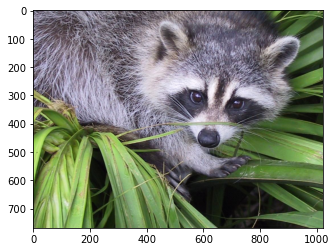

In [39]:
import matplotlib.pyplot as plt
import scipy.misc

face = scipy.misc.face()
plt.imshow(face)
plt.show()

In [22]:
face.shape

(768, 1024, 3)

### RGB 색상 정보

In [51]:
face.dtype

dtype('uint8')

In [52]:
face.min()

0

In [53]:
face.max()

255

### 색상 정보 정규화

In [34]:
face = face/255

### RGB 색상 확인

빨강(Red)색 요소는 각 픽셀의 0번 인덱스로 구성된다.

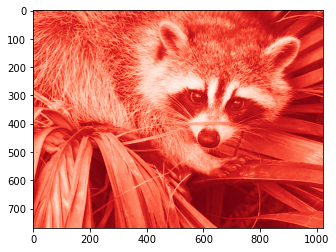

In [23]:
face_red = face[:, :, 0]

plt.imshow(face_red, cmap='Reds_r')
plt.show()

초록(Green)색 요소는 각 픽셀의 1번 인덱스로 구성된다.

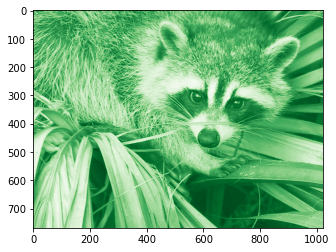

In [24]:
face_green = face[:, :, 1]

plt.imshow(face_green, cmap='Greens_r')
plt.show()

파랑(Blue)색 요소는 각 픽셀의 2번 인덱스로 구성된다.

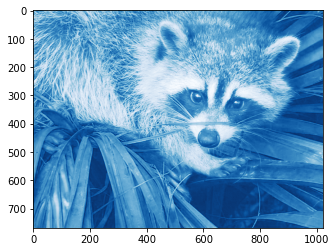

In [25]:
face_blue = face[:, :, 2]

plt.imshow(face_blue, cmap='Blues_r')
plt.show()

### 색지도<font size='2'>color map</font>

<div align="center" border="1px"><img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_002_2_0x.png" style="width:60%;"></div>

### 이미지 크기 조정

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/interpolation01.png" style="width:150px;"></div>

In [30]:
face_half_simple = face[::2, ::2,:]
face_half_simple.shape

(384, 512, 3)

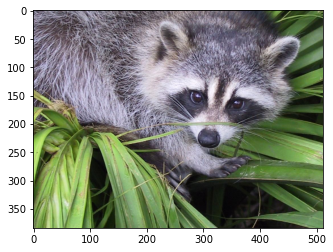

In [31]:
plt.imshow(face_half_simple)
plt.show()

### 보간법

<div align="center" border="1px"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/interpolation02.png" style="width:150px;"></div>

In [35]:
face_half_interpolation = (face[::2, ::2, :] + face[1::2, 1::2, :])/2

face_half_interpolation.shape

(384, 512, 3)

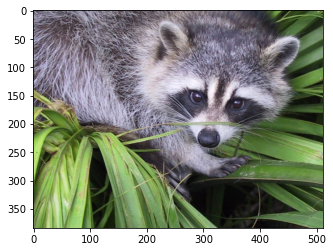

In [36]:
plt.imshow(face_half_interpolation)
plt.show()